In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("telcom_data.csv")

In [3]:
data.head() 

Bearer Id            Start  Start ms              End  End ms  \
0  1.311450e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311450e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311450e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311450e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311450e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
0  1823652.0  2.082010e+14   3.366496e+10  3.552120e+13        9.16457E+15   
1  1365104.0  2.082020e+14   3.368185e+10  3.579400e+13            L77566A   
2  1361762.0  2.082000e+14   3.376063e+10  3.528150e+13            D42335A   
3  1321509.0  2.082010e+14   3.375034e+10  3.535660e+13            T21824A   
4  1089009.0  2.082010e+14   3.369980e+10  3.540700e+13            D88865A   

   ...  Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0  ...          15854611.0           2501332.0           8198936.0   
1  ...          20247395.0          19111729.0          18338413.0   
2  ...          19725661.0          14699576.0          17587794.0   
3  ...          21388122.0          15146643.0          13994646.0   
4  ...          15259380.0          18962873.0          17124581.0   

   Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
0           9656251.0        278082303.0         14344150.0       171744450.0   
1          17227132.0        608750074.0          1170709.0       526904238.0   
2           6163408.0        229584621.0           395630.0       410692588.0   
3           1097942.0        799538153.0         10849722.0       749039933.0   
4            415218.0        527707248.0          3529801.0       550709500.0   

   Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
0         8814393.0        36749741.0       308879636.0  
1        15055145.0        53800391.0       653384965.0  
2         4215763.0        27883638.0       279807335.0  
3        12797283.0        43324218.0       846028530.0  
4        13910322.0        38542814.0       569138589.0  

[5 rows x 55 columns]

In [4]:
data.shape

(150001, 55)

In [5]:
data['Handset Type'].value_counts(ascending=False).head(10)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [6]:
data['Handset Manufacturer'].value_counts(ascending=False).head(3)

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [7]:
data.groupby(by= "Handset Manufacturer")["Handset Type"].value_counts().nlargest(5)

Handset Manufacturer  Handset Type           
Huawei                Huawei B528S-23A           19752
Apple                 Apple iPhone 6S (A1688)     9419
                      Apple iPhone 6 (A1586)      9023
undefined             undefined                   8987
Apple                 Apple iPhone 7 (A1778)      6326
Name: Handset Type, dtype: int64

In [8]:
# Identify the top 10 handsets used by customers
top_10_handsets = data['Handset Type'].value_counts().head(10)

# Identify the top 3 handset manufacturers
top_3_manufacturers = data['Handset Manufacturer'].value_counts().head(3)

# Filter the data for the top 3 manufacturers
top_3_manufacturer_data = data[data['Handset Manufacturer'].isin(top_3_manufacturers.index)]

# Identify the top 5 handsets per top 3 handset manufacturers
top_5_handsets_per_manufacturer = top_3_manufacturer_data.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)

# Print the results
print("Top 10 Handsets:")
print(top_10_handsets)

print("\nTop 3 Handset Manufacturers:")

Top 10 Handsets:
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

Top 3 Handset Manufacturers:


In [9]:
d={"Xdr_Session":data["Bearer Id"],
   "Dur_msec":data['Dur. (ms)'],
   "Activity Duration DL (ms)":data["Activity Duration DL (ms)"],
   "Activity Duration UL (ms)":data['Activity Duration UL (ms)'],
   "Social Media DL (Bytes)":data["Social Media DL (Bytes)"],
   "Social Media UL (Bytes)":data["Social Media UL (Bytes)"],
   "YouTube DL (Bytes)":data["Youtube DL (Bytes)"],
   "YouTube UL (Bytes)":data["Youtube UL (Bytes)"],
   "Netflix DL (Bytes)":data["Netflix DL (Bytes)"],
   "Netflix UL (Bytes)":data["Netflix UL (Bytes)"],
   "Google DL (Bytes)":data["Google DL (Bytes)"],
   "Google UL (Bytes)":data["Google UL (Bytes)"],
   "Google UL (Bytes)":data["Google UL (Bytes)"],
   "Email DL (Bytes)":data["Email DL (Bytes)"],
   "Email UL (Bytes)":data["Email UL (Bytes)"],
   "Gaming DL (Bytes)":data["Gaming DL (Bytes)"],
   "Gaming UL (Bytes)":data["Gaming UL (Bytes)"],
   "Other DL":data["Other DL (Bytes)"],
   "Other UL":data["Other UL (Bytes)"],
  "total_DL_vol(bytes)":data['Total DL (Bytes)'],
   "total_Ul_vol(bytes)":data["Total UL (Bytes)"]}

In [10]:
df=pd.DataFrame(d)

In [11]:
df

Xdr_Session   Dur_msec  Activity Duration DL (ms)  \
0       1.311450e+19  1823652.0                    37624.0   
1       1.311450e+19  1365104.0                      168.0   
2       1.311450e+19  1361762.0                        0.0   
3       1.311450e+19  1321509.0                     3330.0   
4       1.311450e+19  1089009.0                        0.0   
...              ...        ...                        ...   
149996  7.277830e+18    81230.0                    42376.0   
149997  7.349880e+18    97970.0                    17264.0   
149998  1.311450e+19    98249.0                    25003.0   
149999  1.311450e+19    97910.0                    13405.0   
150000           NaN        NaN                        NaN   

        Activity Duration UL (ms)  Social Media DL (Bytes)  \
0                         38787.0              1545765.000   
1                          3560.0              1926113.000   
2                             0.0              1684053.000   
3                         37882.0               644121.000   
4                             0.0               862600.000   
...                           ...                      ...   
149996                    41915.0              3464974.000   
149997                    16759.0              2344568.000   
149998                    28640.0              1245845.000   
149999                    34088.0               801547.000   
150000                        NaN              1795321.774   

        Social Media UL (Bytes)  YouTube DL (Bytes)  YouTube UL (Bytes)  \
0                   24420.00000          15854611.0          2501332.00   
1                    7165.00000          20247395.0         19111729.00   
2                   42224.00000          19725661.0         14699576.00   
3                   13372.00000          21388122.0         15146643.00   
4                   50188.00000          15259380.0         18962873.00   
...                         ...                 ...                 ...   
149996              52091.00000          16191667.0         11763428.00   
149997               7613.00000          13877234.0          8288284.00   
149998              14394.00000          22660510.0          1855903.00   
149999              21562.00000           8817106.0          8305402.00   
150000              32928.43438          11634072.5         11009410.13   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Google DL (Bytes)  \
0               8198936.00          9656251.00        1634479.000   
1              18338413.00         17227132.00        3493924.000   
2              17587794.00          6163408.00        8535055.000   
3              13994646.00          1097942.00        9023734.000   
4              17124581.00           415218.00        6248284.000   
...                    ...                 ...                ...   
149996         17883703.00         19678161.00        9967603.000   
149997         19350146.00         21293148.00        2229420.000   
149998          9963942.00          5065760.00        3850890.000   
149999          3322253.00         13172589.00        4189773.000   
150000         11626851.72         11001754.82        5750752.619   

        Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  \
0             1271433.000       3563542.000       137762.0000   
1              920172.000        629046.000       308339.0000   
2             1694064.000       2690151.000       672973.0000   
3             2788027.000       1439754.000       631229.0000   
4             1500559.000       1936496.000       173853.0000   
...                   ...               ...               ...   
149996        2817311.000         57639.000       633237.0000   
149997        2185941.000       1954414.000       167304.0000   
149998        2734579.000       1525734.000       532543.0000   
149999        3567494.000       2228270.000       622644.0000   
150000        2056541.926       1791728.868       467373.4419   

        

####  Here is a description of the relevant variables in the dataset along with their associated data types:

Xdr_Session: Bearer Id

Dur_msec: Represents the duration in milliseconds. Data type: Numeric (Integer).

Activity Duration DL (ms): Total Download (Downlink) in ms

Activity Duration UL (ms) : Total Upload (Uplink) in ms

Social Media DL (Bytes): Indicates the number of bytes downloaded for social media. Data type: Numeric (Integer).

Social Media UL (Bytes): Represents the number of bytes uploaded for social media. Data type: Numeric (Integer).

YouTube DL (Bytes): Indicates the number of bytes downloaded for YouTube. Data type: Numeric (Integer).

YouTube UL (Bytes): Represents the number of bytes uploaded for YouTube. Data type: Numeric (Integer).

Netflix DL (Bytes): Indicates the number of bytes downloaded for Netflix. Data type: Numeric (Integer).

Netflix UL (Bytes): Represents the number of bytes uploaded for Netflix. Data type: Numeric (Integer).

Google DL (Bytes): Indicates the number of bytes downloaded for Google. Data type: Numeric (Integer).

Google UL (Bytes): Represents the number of bytes uploaded for Google. Data type: Numeric (Integer).

Email DL (Bytes): Indicates the number of bytes downloaded for email. Data type: Numeric (Integer).

Email UL (Bytes): Represents the number of bytes uploaded for email. Data type: Numeric (Integer).

Gaming DL (Bytes): Indicates the number of bytes downloaded for gaming. Data type: Numeric (Integer).

Gaming UL (Bytes): Represents the number of bytes uploaded for gaming. Data type: Numeric (Integer).

Other DL: Indicates the number of bytes downloaded for other purposes. Data type: Numeric (Integer).

Other UL: Represents the number of bytes uploaded for other purposes. Data type: Numeric (Integer).

total_DL_vol(bytes): Represents the total number of bytes downloaded. Data type: Numeric (Integer).

total_Ul_vol(bytes): Represents the total number of bytes uploaded. Data type: Numeric (Integer).

These variables contain numerical data representing the volumes of data downloaded and uploaded in bytes, as well as the duration in milliseconds.

In [12]:
df.head()

Xdr_Session   Dur_msec  Activity Duration DL (ms)  \
0  1.311450e+19  1823652.0                    37624.0   
1  1.311450e+19  1365104.0                      168.0   
2  1.311450e+19  1361762.0                        0.0   
3  1.311450e+19  1321509.0                     3330.0   
4  1.311450e+19  1089009.0                        0.0   

   Activity Duration UL (ms)  Social Media DL (Bytes)  \
0                    38787.0                1545765.0   
1                     3560.0                1926113.0   
2                        0.0                1684053.0   
3                    37882.0                 644121.0   
4                        0.0                 862600.0   

   Social Media UL (Bytes)  YouTube DL (Bytes)  YouTube UL (Bytes)  \
0                  24420.0          15854611.0           2501332.0   
1                   7165.0          20247395.0          19111729.0   
2                  42224.0          19725661.0          14699576.0   
3                  13372.0          21388122.0          15146643.0   
4                  50188.0          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Google DL (Bytes)  \
0           8198936.0           9656251.0          1634479.0   
1          18338413.0          17227132.0          3493924.0   
2          17587794.0           6163408.0          8535055.0   
3          13994646.0           1097942.0          9023734.0   
4          17124581.0            415218.0          6248284.0   

   Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  Gaming DL (Bytes)  \
0          1271433.0         3563542.0          137762.0        278082303.0   
1           920172.0          629046.0          308339.0        608750074.0   
2          1694064.0         2690151.0          672973.0        229584621.0   
3          2788027.0         1439754.0          631229.0        799538153.0   
4          1500559.0         1936496.0          173853.0        527707248.0   

   Gaming UL (Bytes)     Other DL    Other UL  total_DL_vol(bytes)  \
0         14344150.0  171744450.0   8814393.0          308879636.0   
1          1170709.0  526904238.0  15055145.0          653384965.0   
2           395630.0  410692588.0   4215763.0          279807335.0   
3         10849722.0  749039933.0  12797283.0          846028530.0   
4          3529801.0  550709500.0  13910322.0          569138589.0   

   total_Ul_vol(bytes)  
0           36749741.0  
1           53800391.0  
2           27883638.0  
3           43324218.0  
4           38542814.0

In [13]:
df.shape

(150001, 20)

In [14]:
df.head()

Xdr_Session   Dur_msec  Activity Duration DL (ms)  \
0  1.311450e+19  1823652.0                    37624.0   
1  1.311450e+19  1365104.0                      168.0   
2  1.311450e+19  1361762.0                        0.0   
3  1.311450e+19  1321509.0                     3330.0   
4  1.311450e+19  1089009.0                        0.0   

   Activity Duration UL (ms)  Social Media DL (Bytes)  \
0                    38787.0                1545765.0   
1                     3560.0                1926113.0   
2                        0.0                1684053.0   
3                    37882.0                 644121.0   
4                        0.0                 862600.0   

   Social Media UL (Bytes)  YouTube DL (Bytes)  YouTube UL (Bytes)  \
0                  24420.0          15854611.0           2501332.0   
1                   7165.0          20247395.0          19111729.0   
2                  42224.0          19725661.0          14699576.0   
3                  13372.0          21388122.0          15146643.0   
4                  50188.0          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Google DL (Bytes)  \
0           8198936.0           9656251.0          1634479.0   
1          18338413.0          17227132.0          3493924.0   
2          17587794.0           6163408.0          8535055.0   
3          13994646.0           1097942.0          9023734.0   
4          17124581.0            415218.0          6248284.0   

   Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  Gaming DL (Bytes)  \
0          1271433.0         3563542.0          137762.0        278082303.0   
1           920172.0          629046.0          308339.0        608750074.0   
2          1694064.0         2690151.0          672973.0        229584621.0   
3          2788027.0         1439754.0          631229.0        799538153.0   
4          1500559.0         1936496.0          173853.0        527707248.0   

   Gaming UL (Bytes)     Other DL    Other UL  total_DL_vol(bytes)  \
0         14344150.0  171744450.0   8814393.0          308879636.0   
1          1170709.0  526904238.0  15055145.0          653384965.0   
2           395630.0  410692588.0   4215763.0          279807335.0   
3         10849722.0  749039933.0  12797283.0          846028530.0   
4          3529801.0  550709500.0  13910322.0          569138589.0   

   total_Ul_vol(bytes)  
0           36749741.0  
1           53800391.0  
2           27883638.0  
3           43324218.0  
4           38542814.0

In [15]:
df.isnull().sum()

Xdr_Session                  991
Dur_msec                       1
Activity Duration DL (ms)      1
Activity Duration UL (ms)      1
Social Media DL (Bytes)        0
Social Media UL (Bytes)        0
YouTube DL (Bytes)             0
YouTube UL (Bytes)             0
Netflix DL (Bytes)             0
Netflix UL (Bytes)             0
Google DL (Bytes)              0
Google UL (Bytes)              0
Email DL (Bytes)               0
Email UL (Bytes)               0
Gaming DL (Bytes)              0
Gaming UL (Bytes)              0
Other DL                       0
Other UL                       0
total_DL_vol(bytes)            1
total_Ul_vol(bytes)            1
dtype: int64

In [16]:
# Filling the missing null values
for i in df.columns:
    if df[i].dtypes == "object":
        mode_value = df[i].mode()[0]
        df[i].fillna(mode_value, inplace = True)
    elif df[i].dtypes != "object":
        mean_value = df[i].mean()
        df[i].fillna(mean_value, inplace = True)

In [17]:
df.isnull().sum()

Xdr_Session                  0
Dur_msec                     0
Activity Duration DL (ms)    0
Activity Duration UL (ms)    0
Social Media DL (Bytes)      0
Social Media UL (Bytes)      0
YouTube DL (Bytes)           0
YouTube UL (Bytes)           0
Netflix DL (Bytes)           0
Netflix UL (Bytes)           0
Google DL (Bytes)            0
Google UL (Bytes)            0
Email DL (Bytes)             0
Email UL (Bytes)             0
Gaming DL (Bytes)            0
Gaming UL (Bytes)            0
Other DL                     0
Other UL                     0
total_DL_vol(bytes)          0
total_Ul_vol(bytes)          0
dtype: int64

In [18]:
q1=np.percentile(df,25)
q2=np.percentile(df,50)
q3=np.percentile(df,75)
print(f"My Q1= {q1}, Q2= {q2}, Q3= {q3}")

My Q1= 661358.5, Q2= 5566039.0, Q3= 22369651.25


In [19]:
iqr=q3-q1
iqr

21708292.75

In [20]:
lower_range=q1-iqr*1.5
upper_range=q3+iqr*1.5
print(f"Lower range= {lower_range} , Upper Range= {upper_range}")

Lower range= -31901080.625 , Upper Range= 54932090.375


In [21]:
def find_outliers_iqr(df, threshold=1.5):
    outliers = pd.DataFrame()
    for column in df.columns:
        if df[column].dtype != 'object':  # Exclude non-numeric columns
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            outliers = pd.concat([outliers, column_outliers])
            
            # Replace outliers with the mean
            df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                                  df[column].mean(),
                                  df[column])
            
    return outliers

In [23]:
df.head()

Xdr_Session   Dur_msec  Activity Duration DL (ms)  \
0  1.311450e+19  1823652.0                    37624.0   
1  1.311450e+19  1365104.0                      168.0   
2  1.311450e+19  1361762.0                        0.0   
3  1.311450e+19  1321509.0                     3330.0   
4  1.311450e+19  1089009.0                        0.0   

   Activity Duration UL (ms)  Social Media DL (Bytes)  \
0                    38787.0                1545765.0   
1                     3560.0                1926113.0   
2                        0.0                1684053.0   
3                    37882.0                 644121.0   
4                        0.0                 862600.0   

   Social Media UL (Bytes)  YouTube DL (Bytes)  YouTube UL (Bytes)  \
0                  24420.0          15854611.0           2501332.0   
1                   7165.0          20247395.0          19111729.0   
2                  42224.0          19725661.0          14699576.0   
3                  13372.0          21388122.0          15146643.0   
4                  50188.0          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Google DL (Bytes)  \
0           8198936.0           9656251.0          1634479.0   
1          18338413.0          17227132.0          3493924.0   
2          17587794.0           6163408.0          8535055.0   
3          13994646.0           1097942.0          9023734.0   
4          17124581.0            415218.0          6248284.0   

   Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  Gaming DL (Bytes)  \
0          1271433.0         3563542.0          137762.0        278082303.0   
1           920172.0          629046.0          308339.0        608750074.0   
2          1694064.0         2690151.0          672973.0        229584621.0   
3          2788027.0         1439754.0          631229.0        799538153.0   
4          1500559.0         1936496.0          173853.0        527707248.0   

   Gaming UL (Bytes)     Other DL    Other UL  total_DL_vol(bytes)  \
0         14344150.0  171744450.0   8814393.0          308879636.0   
1          1170709.0  526904238.0  15055145.0          653384965.0   
2           395630.0  410692588.0   4215763.0          279807335.0   
3         10849722.0  749039933.0  12797283.0          846028530.0   
4          3529801.0  550709500.0  13910322.0          569138589.0   

   total_Ul_vol(bytes)  
0           36749741.0  
1           53800391.0  
2           27883638.0  
3           43324218.0  
4           38542814.0

In [24]:
df.describe() #basic metrics (mean, min,max,STD,count,Q1,Q2,Q3)

Xdr_Session      Dur_msec  Activity Duration DL (ms)  \
count  1.500010e+05  1.500010e+05               1.500010e+05   
mean   1.013887e+19  1.046086e+05               1.829177e+06   
std    2.883597e+18  8.103735e+04               5.696376e+06   
min    6.917540e+18  7.142000e+03               0.000000e+00   
25%    7.349880e+18  5.744200e+04               1.487800e+04   
50%    7.349880e+18  8.639900e+04               3.930500e+04   
75%    1.304240e+19  1.324300e+05               6.796110e+05   
max    1.318650e+19  1.859336e+06               1.365365e+08   

       Activity Duration UL (ms)  Social Media DL (Bytes)  \
count               1.500010e+05             1.500010e+05   
mean                1.408880e+06             1.795322e+06   
std                 4.643215e+06             1.035482e+06   
min                 0.000000e+00             1.200000e+01   
25%                 2.154000e+04             8.991480e+05   
50%                 4.679400e+04             1.794369e+06   
75%                 5.991140e+05             2.694938e+06   
max                 1.449113e+08             3.586064e+06   

       Social Media UL (Bytes)  YouTube DL (Bytes)  YouTube UL (Bytes)  \
count            150001.000000        1.500010e+05        1.500010e+05   
mean              32928.434380        1.163407e+07        1.100941e+07   
std               19006.178256        6.710569e+06        6.345423e+06   
min                   0.000000        5.300000e+01        1.050000e+02   
25%               16448.000000        5.833501e+06        5.517965e+06   
50%               32920.000000        1.161602e+07        1.101345e+07   
75%               49334.000000        1.744852e+07        1.651556e+07   
max               65870.000000        2.325910e+07        2.201196e+07   

       Netflix DL (Bytes)  Netflix UL (Bytes)  Google DL (Bytes)  \
count        1.500010e+05        1.500010e+05       1.500010e+05   
mean         1.162685e+07        1.100175e+07       5.750753e+06   
std          6.725218e+06        6.359490e+06       3.309097e+06   
min          4.200000e+01        3.500000e+01       2.070000e+02   
25%          5.777156e+06        5.475981e+06       2.882393e+06   
50%          1.164222e+07        1.099638e+07       5.765829e+06   
75%          1.747048e+07        1.650727e+07       8.623552e+06   
max          2.325919e+07        2.201196e+07       1.146283e+07   

       Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  \
count       1.500010e+05      1.500010e+05     150001.000000   
mean        2.056542e+06      1.791729e+06     467373.441940   
std         1.189917e+06      1.035840e+06     269969.307031   
min         3.000000e+00      1.400000e+01          2.000000   
25%         1.024279e+06      8.927930e+05     233383.000000   
50%         2.054573e+06      1.793505e+06     466250.000000   
75%         3.088454e+06      2.689327e+06     700440.000000   
max         4.121357e+06      3.586146e+06     936418.000000   

       Gaming DL (Bytes)  Gaming UL (Bytes)      Other DL      Other UL  \
count       1.500010e+05       1.500010e+05  1.500010e+05  1.500010e+05   
mean        4.220447e+08       8.288398e+06  4.211005e+08  8.264799e+06   
std         2.439675e+08       4.782700e+06  2.432050e+08  4.769004e+06   
min         2.516000e+03       5.900000e+01  3.290000e+03  1.480000e+02   
25%         2.104733e+08       4.128476e+06  2.101869e+08  4.145943e+06   
50%         4.234081e+08       8.291208e+06  4.218030e+08  8.267071e+06   
75%         6.331742e+08       1.243162e+07  6.316918e+08  1.238415e+07   
max         8.434419e+08       1.655879e+07  8.434425e+08  1.655882e+07   

       total_DL_vol(bytes)  total_Ul_vol(bytes)  
count         1.500010e+05         1.500010e+05  
mean          4.546434e+08         4.112121e+07  
std           2.441421e+08         1.127635e+07  
min           7.114041e+06         2.866892e+06  
25%           2.431072e+08         3.322203e+07  
50%           4.558409e+08         4.114324e+07 

In [25]:

q1=np.percentile(df,25)
q2=np.percentile(df,50)
q3=np.percentile(df,75) 
print(f"My Q1= {q1}, Q2= {q2}, Q3= {q3}")
iqr=q3-q1 
# Central Tendency iqr 
print("MEDIAN=",iqr)

My Q1= 661358.5, Q2= 5566039.0, Q3= 22369651.25
MEDIAN= 21708292.75


In [26]:
categorical_data = []
for col in data.columns:
    if data[col].dtypes == "object":
        categorical_data.append(col)
categorical_data

['Start', 'End', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']

**************************************************
Top 10 categories for Start
4/26/2019 7:25    203
4/26/2019 7:26    190
4/26/2019 7:36    175
4/26/2019 7:30    160
4/26/2019 7:46    143
4/26/2019 7:49    138
4/26/2019 7:40    135
4/26/2019 8:25    135
4/26/2019 7:45    133
4/26/2019 7:31    132
Name: Start, dtype: int64


**************************************************
**************************************************
Top 10 categories for End
4/25/2019 0:01    1150
4/25/2019 0:02     418
4/25/2019 0:00     296
4/25/2019 0:48     286
4/28/2019 0:00     275
4/25/2019 0:03     250
4/28/2019 0:06     248
4/28/2019 0:04     246
4/28/2019 0:02     238
4/28/2019 0:05     236
Name: End, dtype: int64


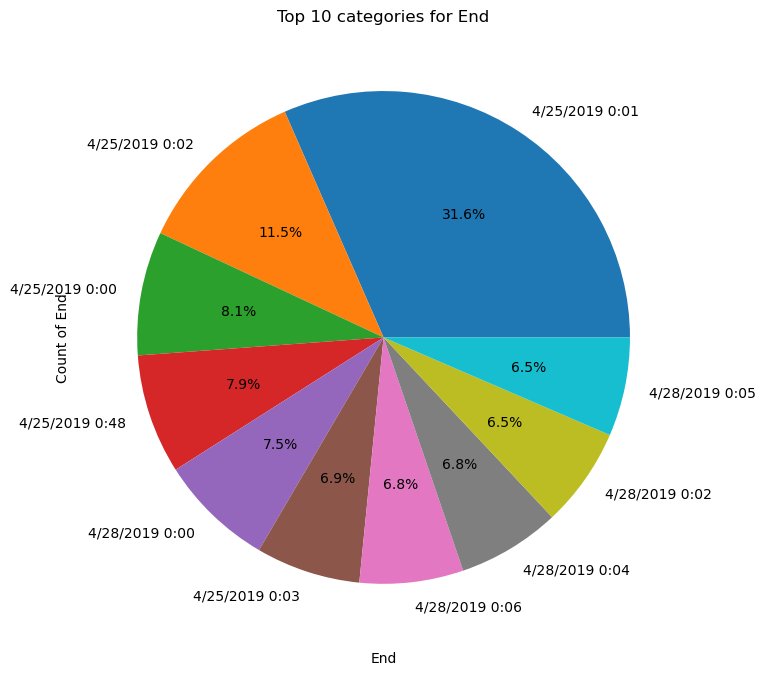

**************************************************
**************************************************
Top 10 categories for Last Location Name
9.16457E+15    1881
8.12222E+16     187
D41377B          80
1.5328E+17       61
D17085A          59
D72396C          57
D73604C          55
D11119B          54
L41377B          51
D11002B          50
Name: Last Location Name, dtype: int64


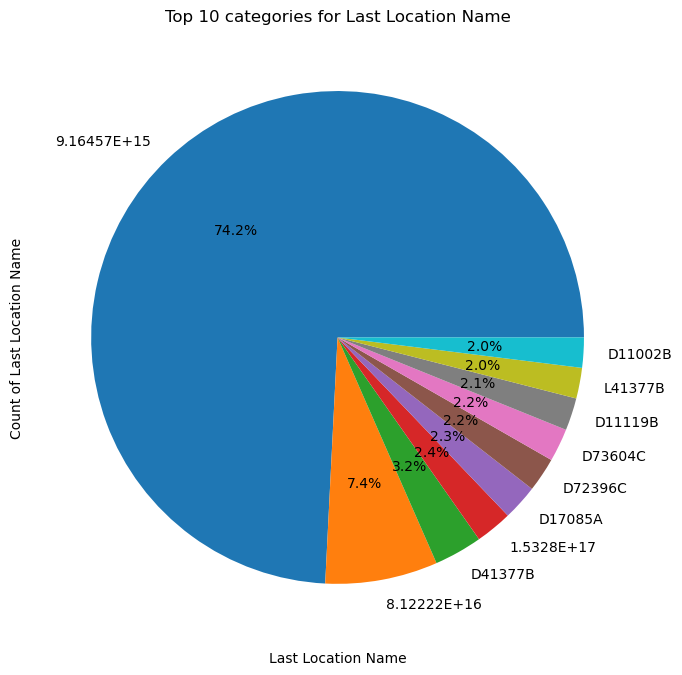

**************************************************
**************************************************
Top 10 categories for Handset Manufacturer
Apple                                   59565
Samsung                                 40839
Huawei                                  34423
undefined                                8987
Sony Mobile Communications Ab             980
Wiko Global Sasu                          747
Xiaomi Communications Co Ltd              397
Oneplus Technology (Shenzhen) Co Ltd      342
Asustek                                   285
Lenovo                                    254
Name: Handset Manufacturer, dtype: int64


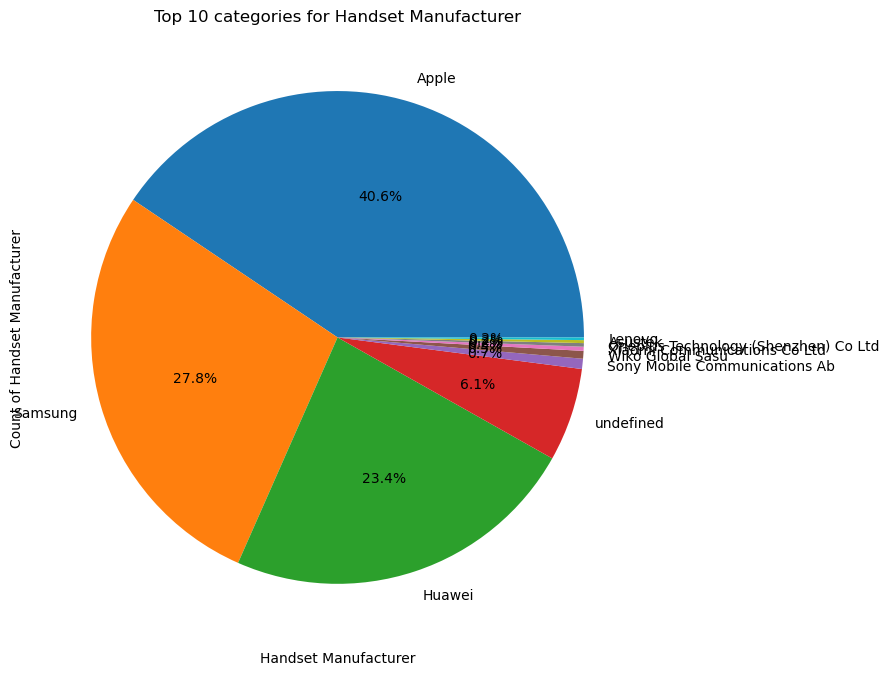

**************************************************
**************************************************
Top 10 categories for Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64


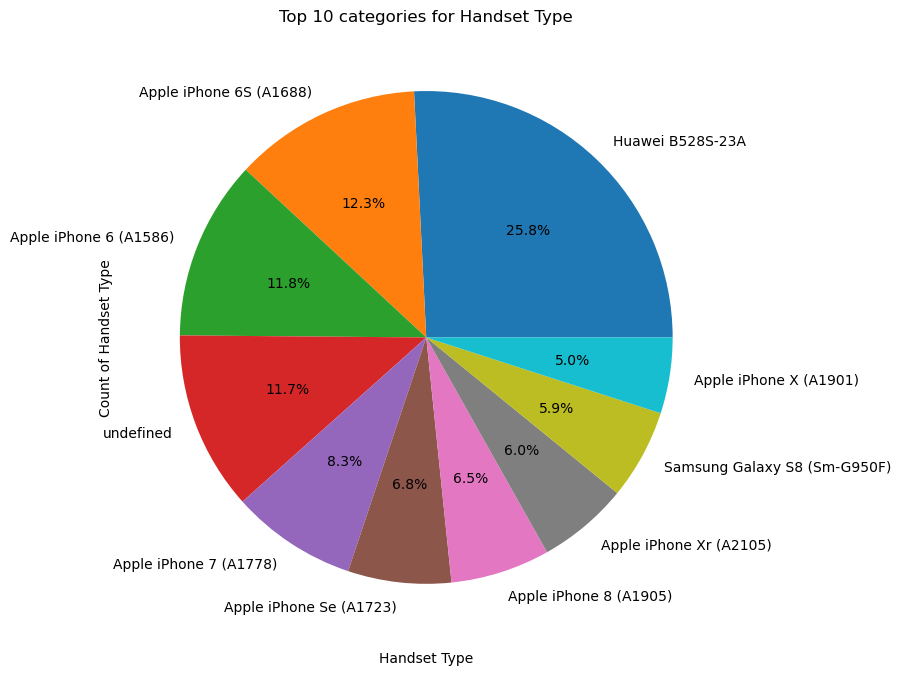

**************************************************


In [27]:
for col in categorical_data:
    print("*"*50)
    print("Top 10 categories for {}".format(col))
    print(data[col].value_counts().sort_values(ascending = False).head(10))
    index = data[col].value_counts().sort_values(ascending = False).head(10).index
    values = data[col].value_counts().sort_values(ascending = False).head(10).values
    plt.figure(figsize = [10,8])
    # plt.barh(index,values)
    plt.pie(values, labels = index,autopct = '%.1f%%')
    plt.xlabel(col)
    plt.ylabel("Count of {}".format(col))
    plt.title("Top 10 categories for {}".format(col))
    plt.grid()
    plt.show();
    print("*"*50)

**************************************************
Top 10 categories for Start
4/26/2019 7:25    203
4/26/2019 7:26    190
4/26/2019 7:36    175
4/26/2019 7:30    160
4/26/2019 7:46    143
4/26/2019 7:49    138
4/26/2019 7:40    135
4/26/2019 8:25    135
4/26/2019 7:45    133
4/26/2019 7:31    132
Name: Start, dtype: int64


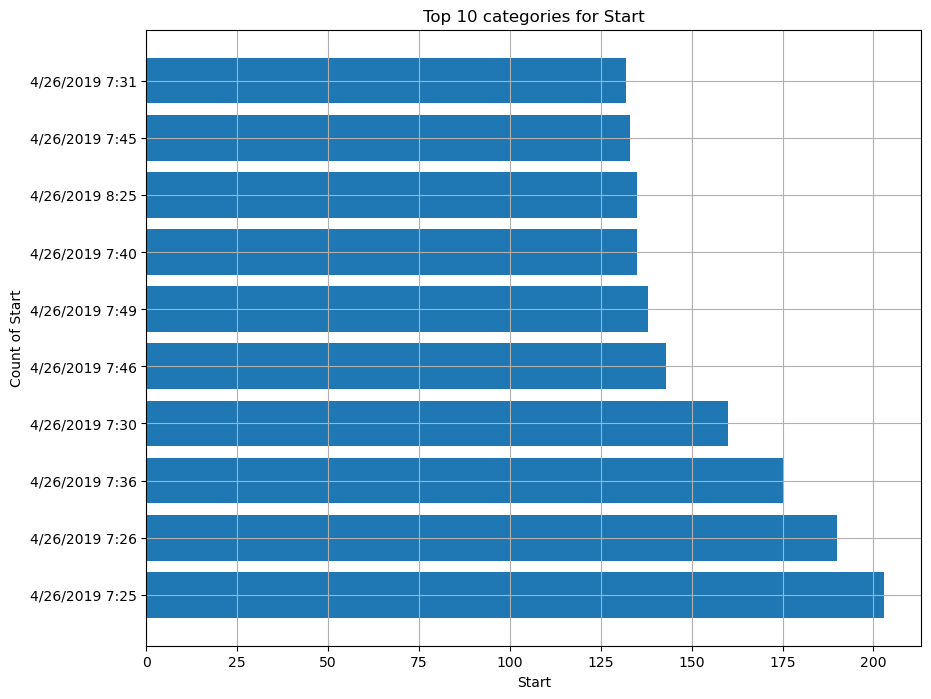

**************************************************
**************************************************
Top 10 categories for End
4/25/2019 0:01    1150
4/25/2019 0:02     418
4/25/2019 0:00     296
4/25/2019 0:48     286
4/28/2019 0:00     275
4/25/2019 0:03     250
4/28/2019 0:06     248
4/28/2019 0:04     246
4/28/2019 0:02     238
4/28/2019 0:05     236
Name: End, dtype: int64


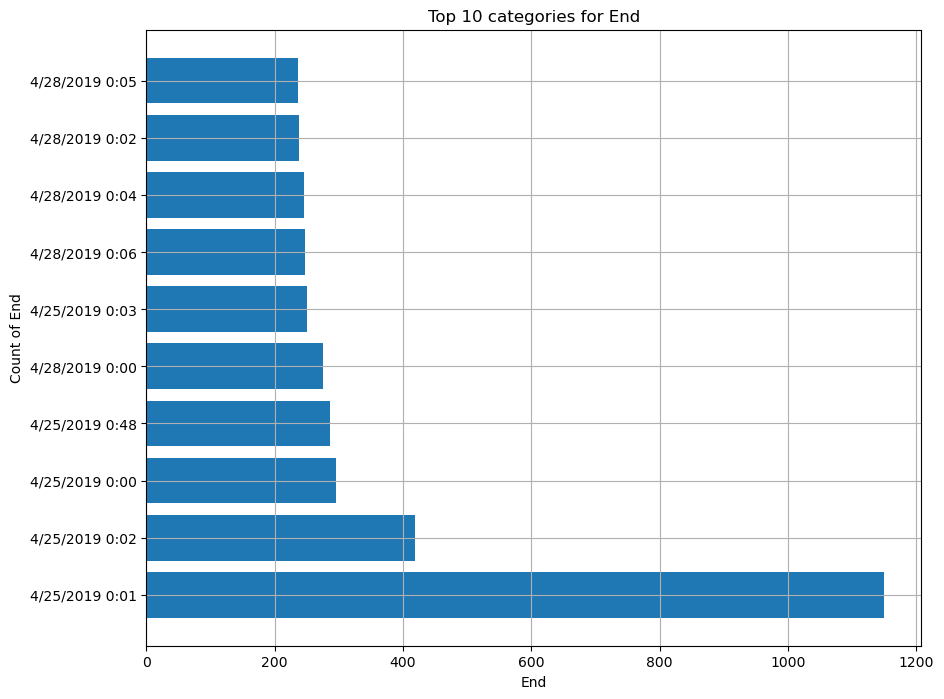

**************************************************
**************************************************
Top 10 categories for Last Location Name
9.16457E+15    1881
8.12222E+16     187
D41377B          80
1.5328E+17       61
D17085A          59
D72396C          57
D73604C          55
D11119B          54
L41377B          51
D11002B          50
Name: Last Location Name, dtype: int64


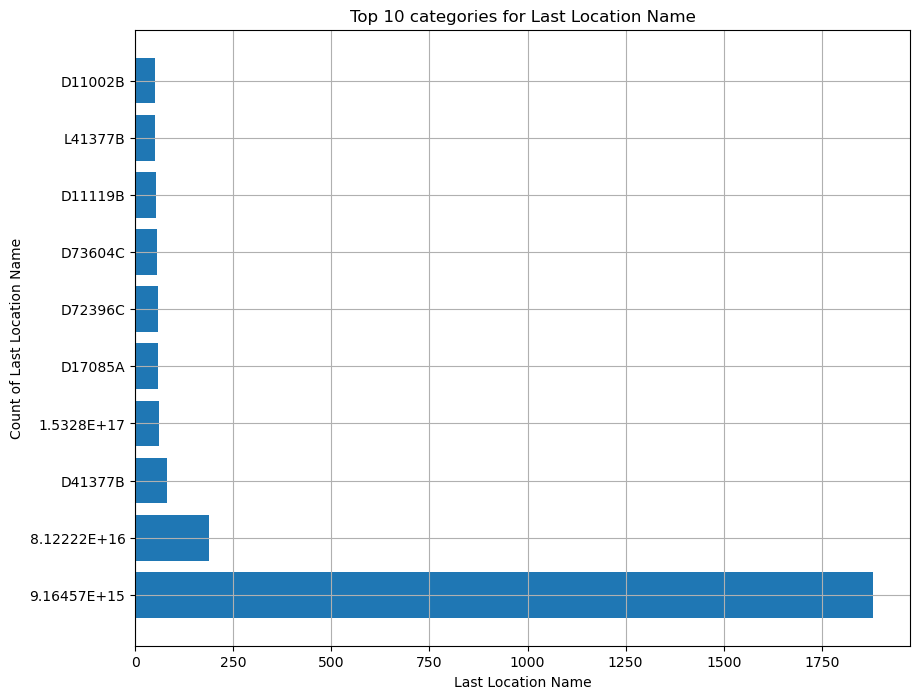

**************************************************
**************************************************
Top 10 categories for Handset Manufacturer
Apple                                   59565
Samsung                                 40839
Huawei                                  34423
undefined                                8987
Sony Mobile Communications Ab             980
Wiko Global Sasu                          747
Xiaomi Communications Co Ltd              397
Oneplus Technology (Shenzhen) Co Ltd      342
Asustek                                   285
Lenovo                                    254
Name: Handset Manufacturer, dtype: int64


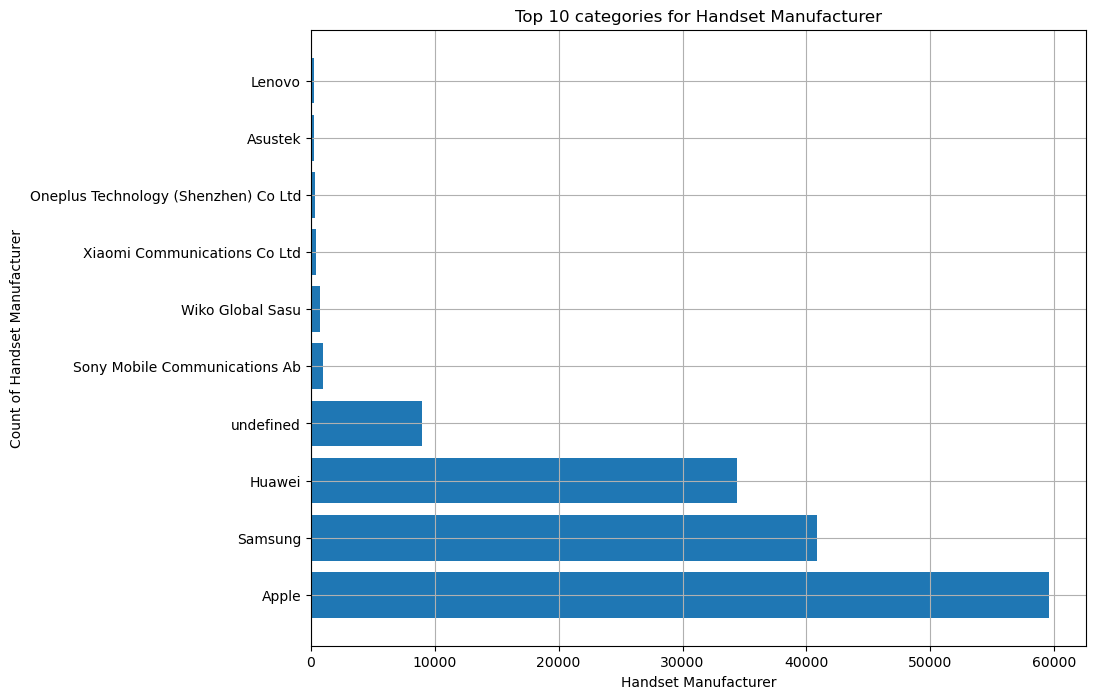

**************************************************
**************************************************
Top 10 categories for Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64


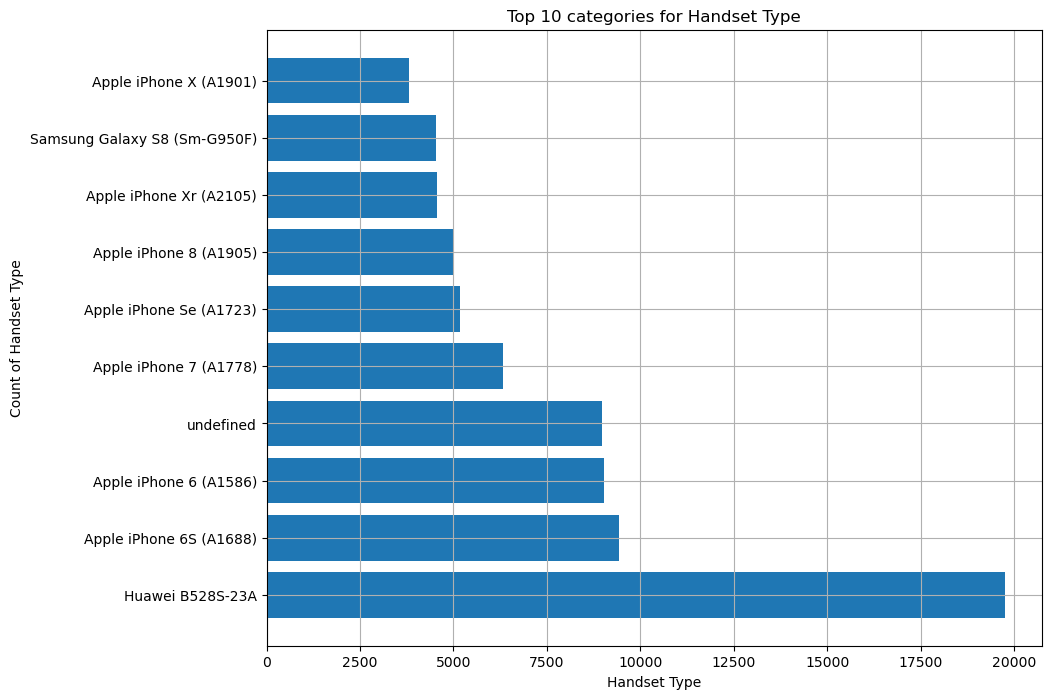

**************************************************


In [28]:
for col in categorical_data:
    print("*"*50)
    print("Top 10 categories for {}".format(col))
    print(data[col].value_counts().sort_values(ascending = False).head(10))
    index = data[col].value_counts().sort_values(ascending = False).head(10).index
    values = data[col].value_counts().sort_values(ascending = False).head(10).values
    plt.figure(figsize = [10,8])
    plt.barh(index,values)
    plt.xlabel(col)
    plt.ylabel("Count of {}".format(col))
    plt.title("Top 10 categories for {}".format(col))
    plt.grid()
    plt.show();
    print("*"*50)

In [29]:
non_categorical_columns= []
for col in df.columns:
    if df[col].dtypes != "object":
        non_categorical_columns.append(col)

In [30]:
non_categorical_columns

['Xdr_Session',
 'Dur_msec',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'YouTube DL (Bytes)',
 'YouTube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL',
 'Other UL',
 'total_DL_vol(bytes)',
 'total_Ul_vol(bytes)']

In [31]:
data.skew()

Bearer Id                                     0.026667
Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952609
IMSI                                         40.992855
MSISDN/Number                               332.155855
IMEI                                          1.071470
Avg RTT DL (ms)                              62.907828
Avg RTT UL (ms)                              28.457415
Avg Bearer TP DL (kbps)                       2.589437
Avg Bearer TP UL (kbps)                       4.503413
TCP DL Retrans. Vol (Bytes)                  15.951809
TCP UL Retrans. Vol (Bytes)                  84.113393
DL TP < 50 Kbps (%)                          -2.297803
50 Kbps < DL TP < 250 Kbps (%)                3.271453
250 Kbps < DL TP < 1 Mbps (%)                 4.566158
DL TP > 1 Mbps (%)                            5.370351
UL TP < 10 Kbps (%)                          -8.985016
10 Kbps < 

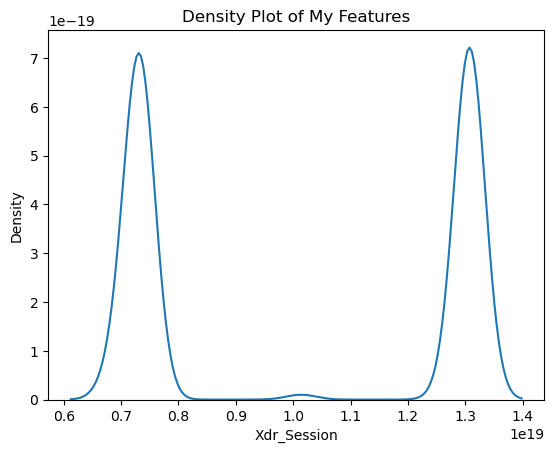

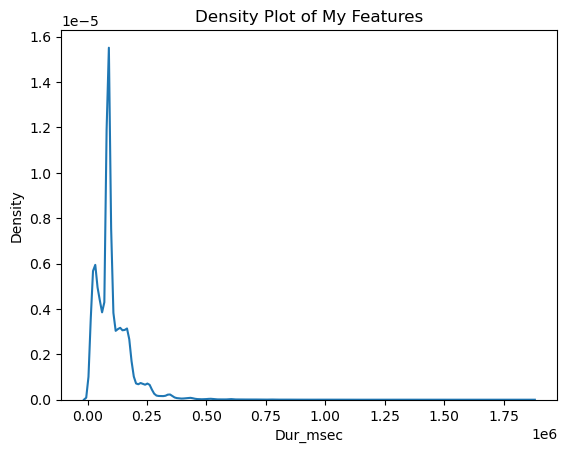

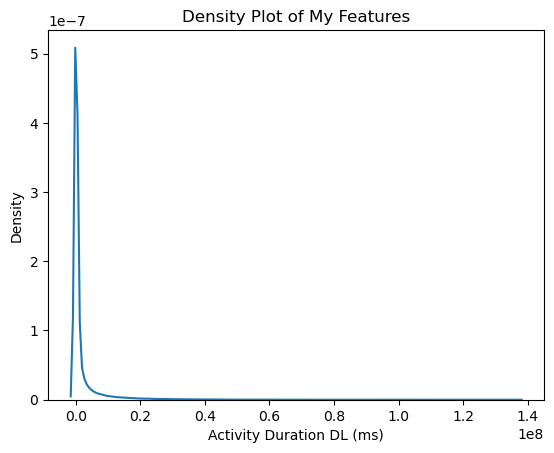

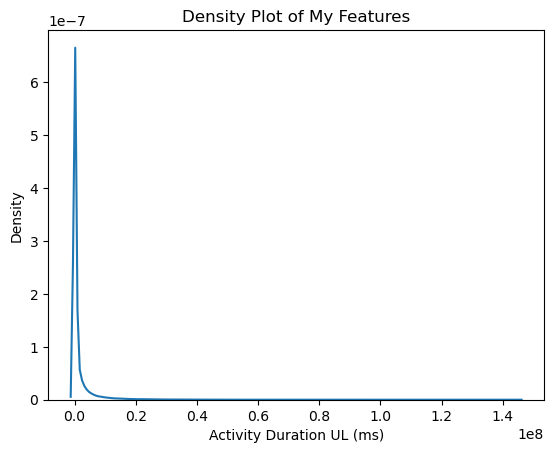

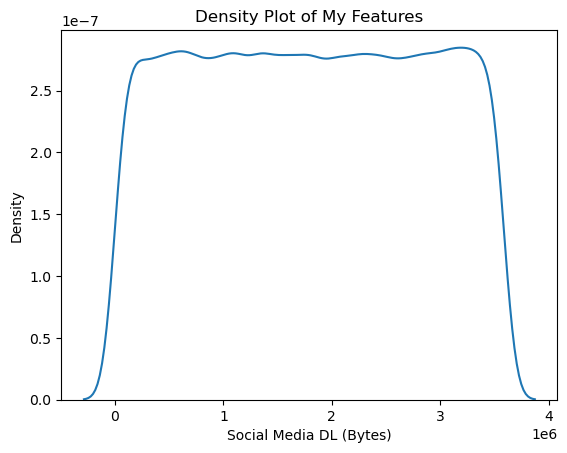

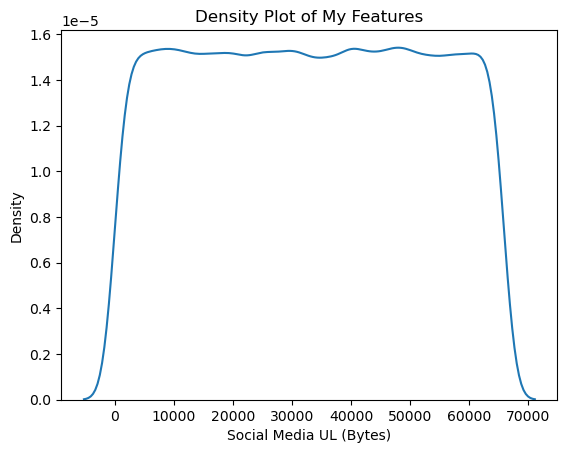

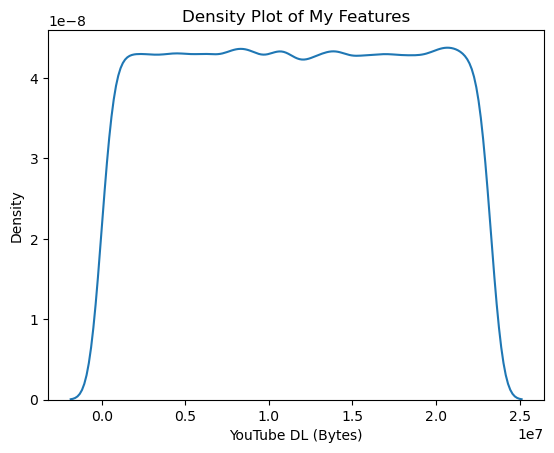

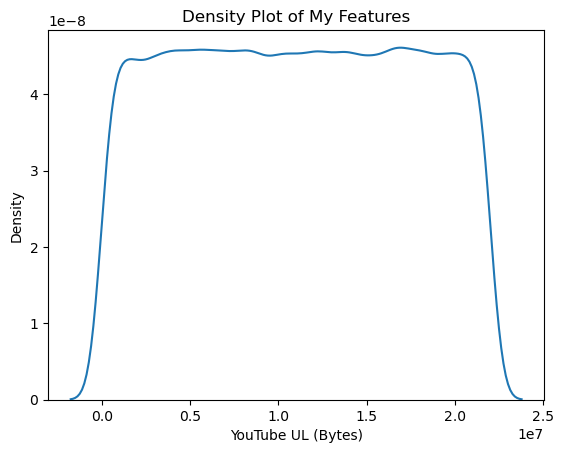

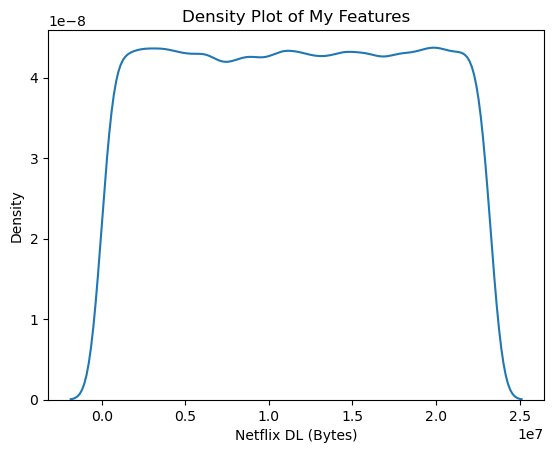

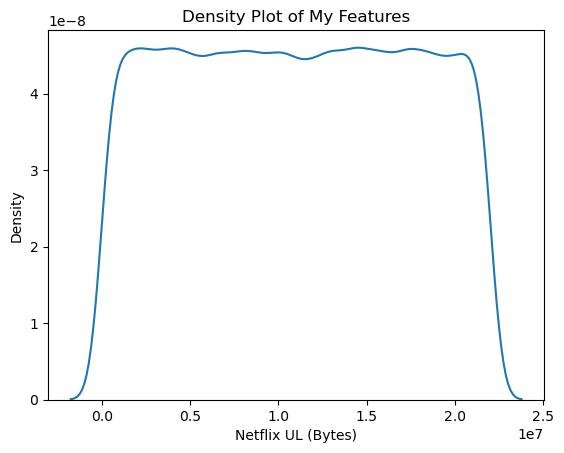

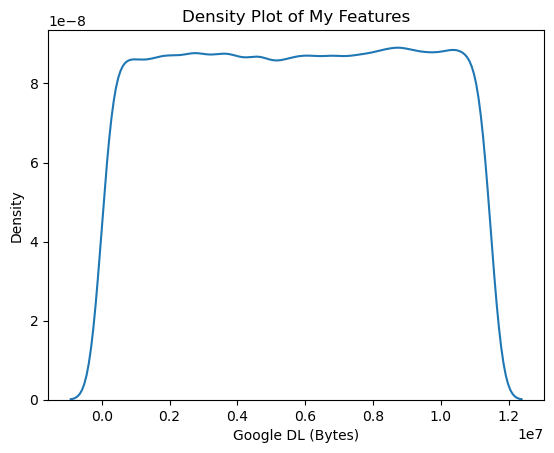

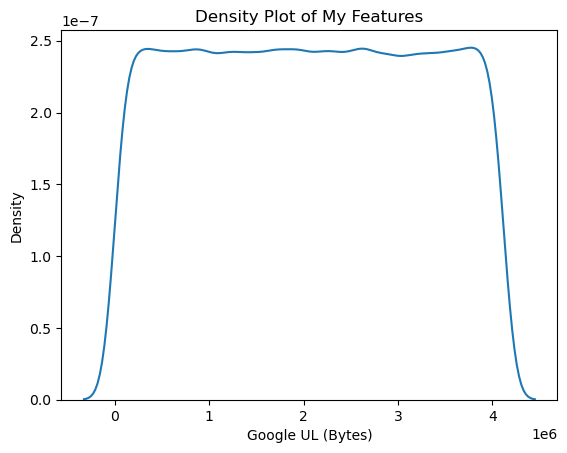

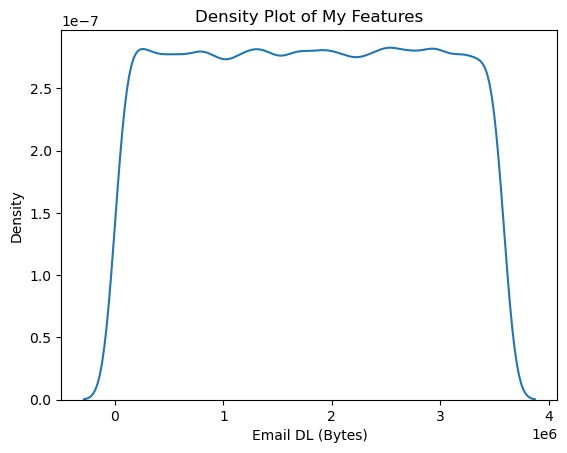

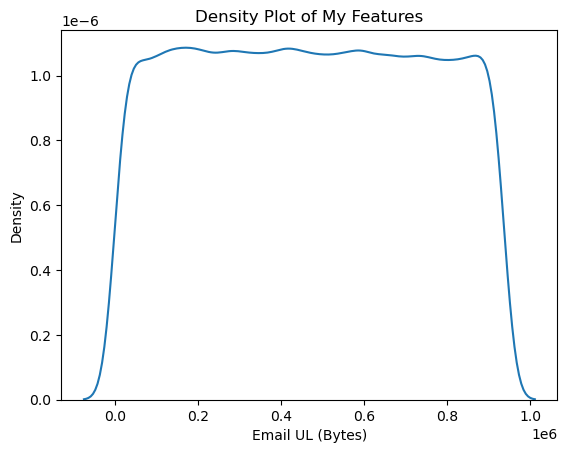

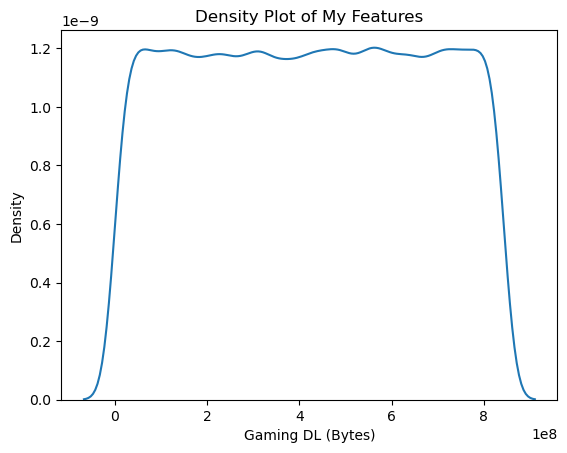

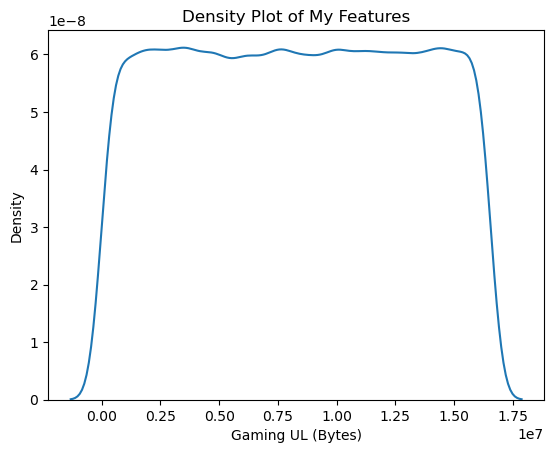

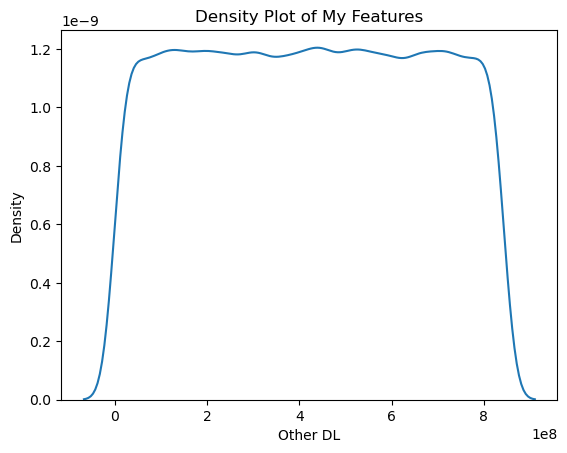

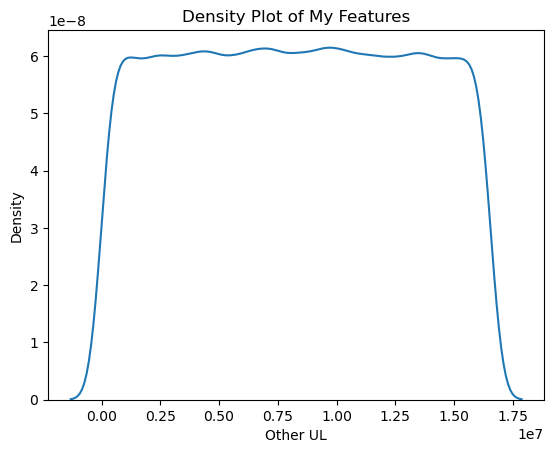

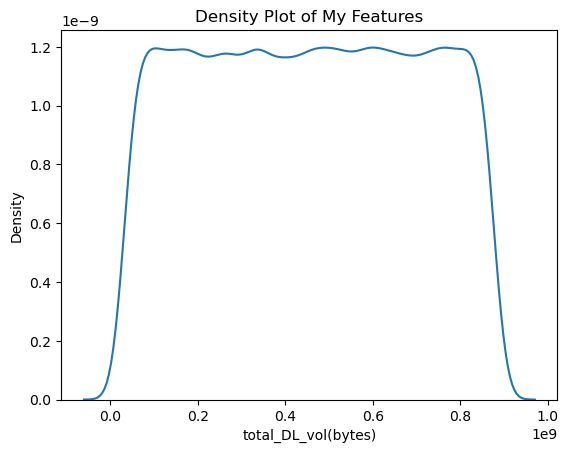

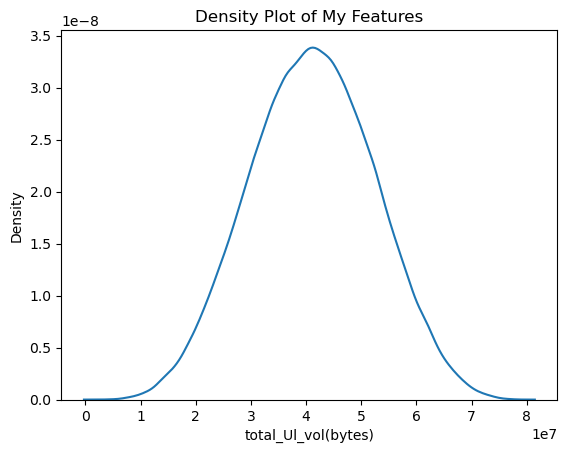

In [32]:
for i in df.columns:
    sns.kdeplot(df[i])
    # Add labels and title to the plot
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.title('Density Plot of My Features')
    # Display the plot
    plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
df_scaled=scaler.fit_transform(df)

In [35]:
df_scaled

array([[ 1.03191896e+00,  2.12130473e+01, -3.14508504e-01, ...,
         1.15243234e-01, -5.97046980e-01, -3.87668020e-01],
       [ 1.03191896e+00,  1.55545513e+01, -3.21083934e-01, ...,
         1.42385468e+00,  8.14043254e-01,  1.12440889e+00],
       [ 1.03191896e+00,  1.55133110e+01, -3.21113426e-01, ...,
        -8.49034764e-01, -7.16126822e-01, -1.17392717e+00],
       ...,
       [ 1.03191896e+00, -7.84771644e-02, -3.16724130e-01, ...,
         6.39533945e-01,  5.65832184e-01, -5.50621751e-01],
       [ 1.03191896e+00, -8.26604345e-02, -3.18760168e-01, ...,
        -1.43801363e+00, -3.38932938e-01, -1.01940342e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.94665634e-11,  0.00000000e+00,  0.00000000e+00]])

(array([[7.65570e+04, 7.34440e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [1.01378e+05, 4.70350e+04, 1.28000e+03, 2.11000e+02, 6.50000e+01,
         2.30000e+01, 6.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00],
        [1.25744e+05, 2.13620e+04, 2.33300e+03, 4.32000e+02, 8.70000e+01,
         4.20000e+01, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00],
        [1.25027e+05, 2.25460e+04, 1.77200e+03, 4.69000e+02, 1.00000e+02,
         5.30000e+01, 3.30000e+01, 0.00000e+00, 0.00000e+00, 1.00000e+00],
        [7.66600e+04, 7.33410e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [7.66190e+04, 7.33820e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [7.66750e+04, 7.33260e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+0

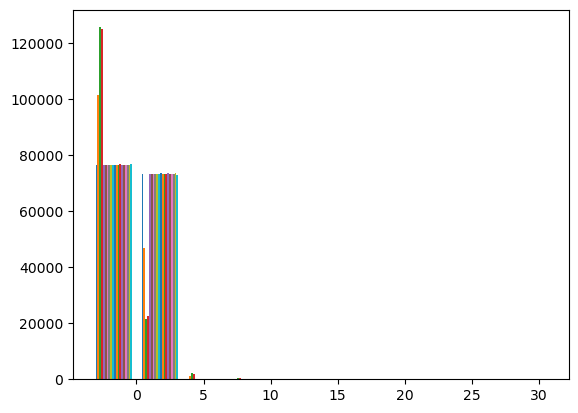

In [36]:
plt.hist(df_scaled)

In [37]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [38]:
data_scaled_minmax = minmax.fit_transform(df)

In [39]:
data_scaled_minmax

array([[9.88514841e-01, 9.80734200e-01, 2.75560094e-04, ...,
        5.32303987e-01, 3.36846254e-01, 4.48991054e-01],
       [9.88514841e-01, 7.33164021e-01, 1.23044056e-06, ...,
        9.09191307e-01, 7.21400795e-01, 6.74933958e-01],
       [9.88514841e-01, 7.31359674e-01, 0.00000000e+00, ...,
        2.54586601e-01, 3.04394259e-01, 3.31503857e-01],
       ...,
       [9.88514841e-01, 4.91886919e-02, 1.83123246e-04, ...,
        6.83302606e-01, 6.53757570e-01, 4.24641605e-01],
       [9.88514841e-01, 4.90056657e-02, 9.81789033e-05, ...,
        8.49574374e-02, 4.07188267e-01, 3.54593653e-01],
       [5.13854266e-01, 5.26222201e-02, 1.33969846e-02, ...,
        4.99113300e-01, 4.99555287e-01, 5.06918556e-01]])

(array([[7.55650e+04, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         9.91000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 7.34440e+04],
        [1.37278e+05, 1.10520e+04, 1.14600e+03, 3.19000e+02, 1.09000e+02,
         5.00000e+01, 2.10000e+01, 1.70000e+01, 3.00000e+00, 6.00000e+00],
        [1.44330e+05, 3.85000e+03, 1.24500e+03, 3.89000e+02, 9.60000e+01,
         5.40000e+01, 3.60000e+01, 0.00000e+00, 0.00000e+00, 1.00000e+00],
        [1.46754e+05, 2.31700e+03, 6.54000e+02, 1.58000e+02, 6.30000e+01,
         5.40000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00],
        [1.48430e+04, 1.51430e+04, 1.48590e+04, 1.51580e+04, 1.49430e+04,
         1.48950e+04, 1.50050e+04, 1.49330e+04, 1.51810e+04, 1.50410e+04],
        [1.49680e+04, 1.51150e+04, 1.49580e+04, 1.49560e+04, 1.50430e+04,
         1.48320e+04, 1.51030e+04, 1.51440e+04, 1.48890e+04, 1.49930e+04],
        [1.49140e+04, 1.49910e+04, 1.50120e+04, 1.52010e+04, 1.49780e+04,
         1.48800e+04, 1.49670e+0

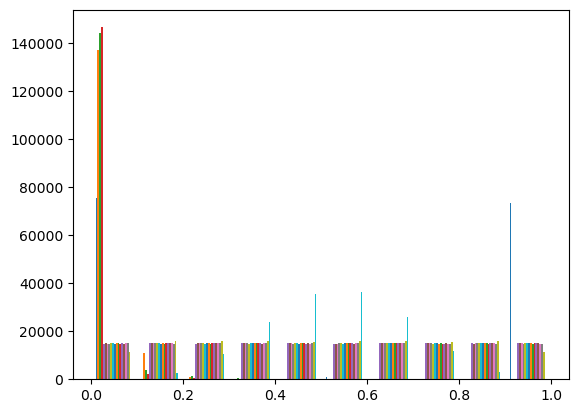

In [40]:
plt.hist(data_scaled_minmax)

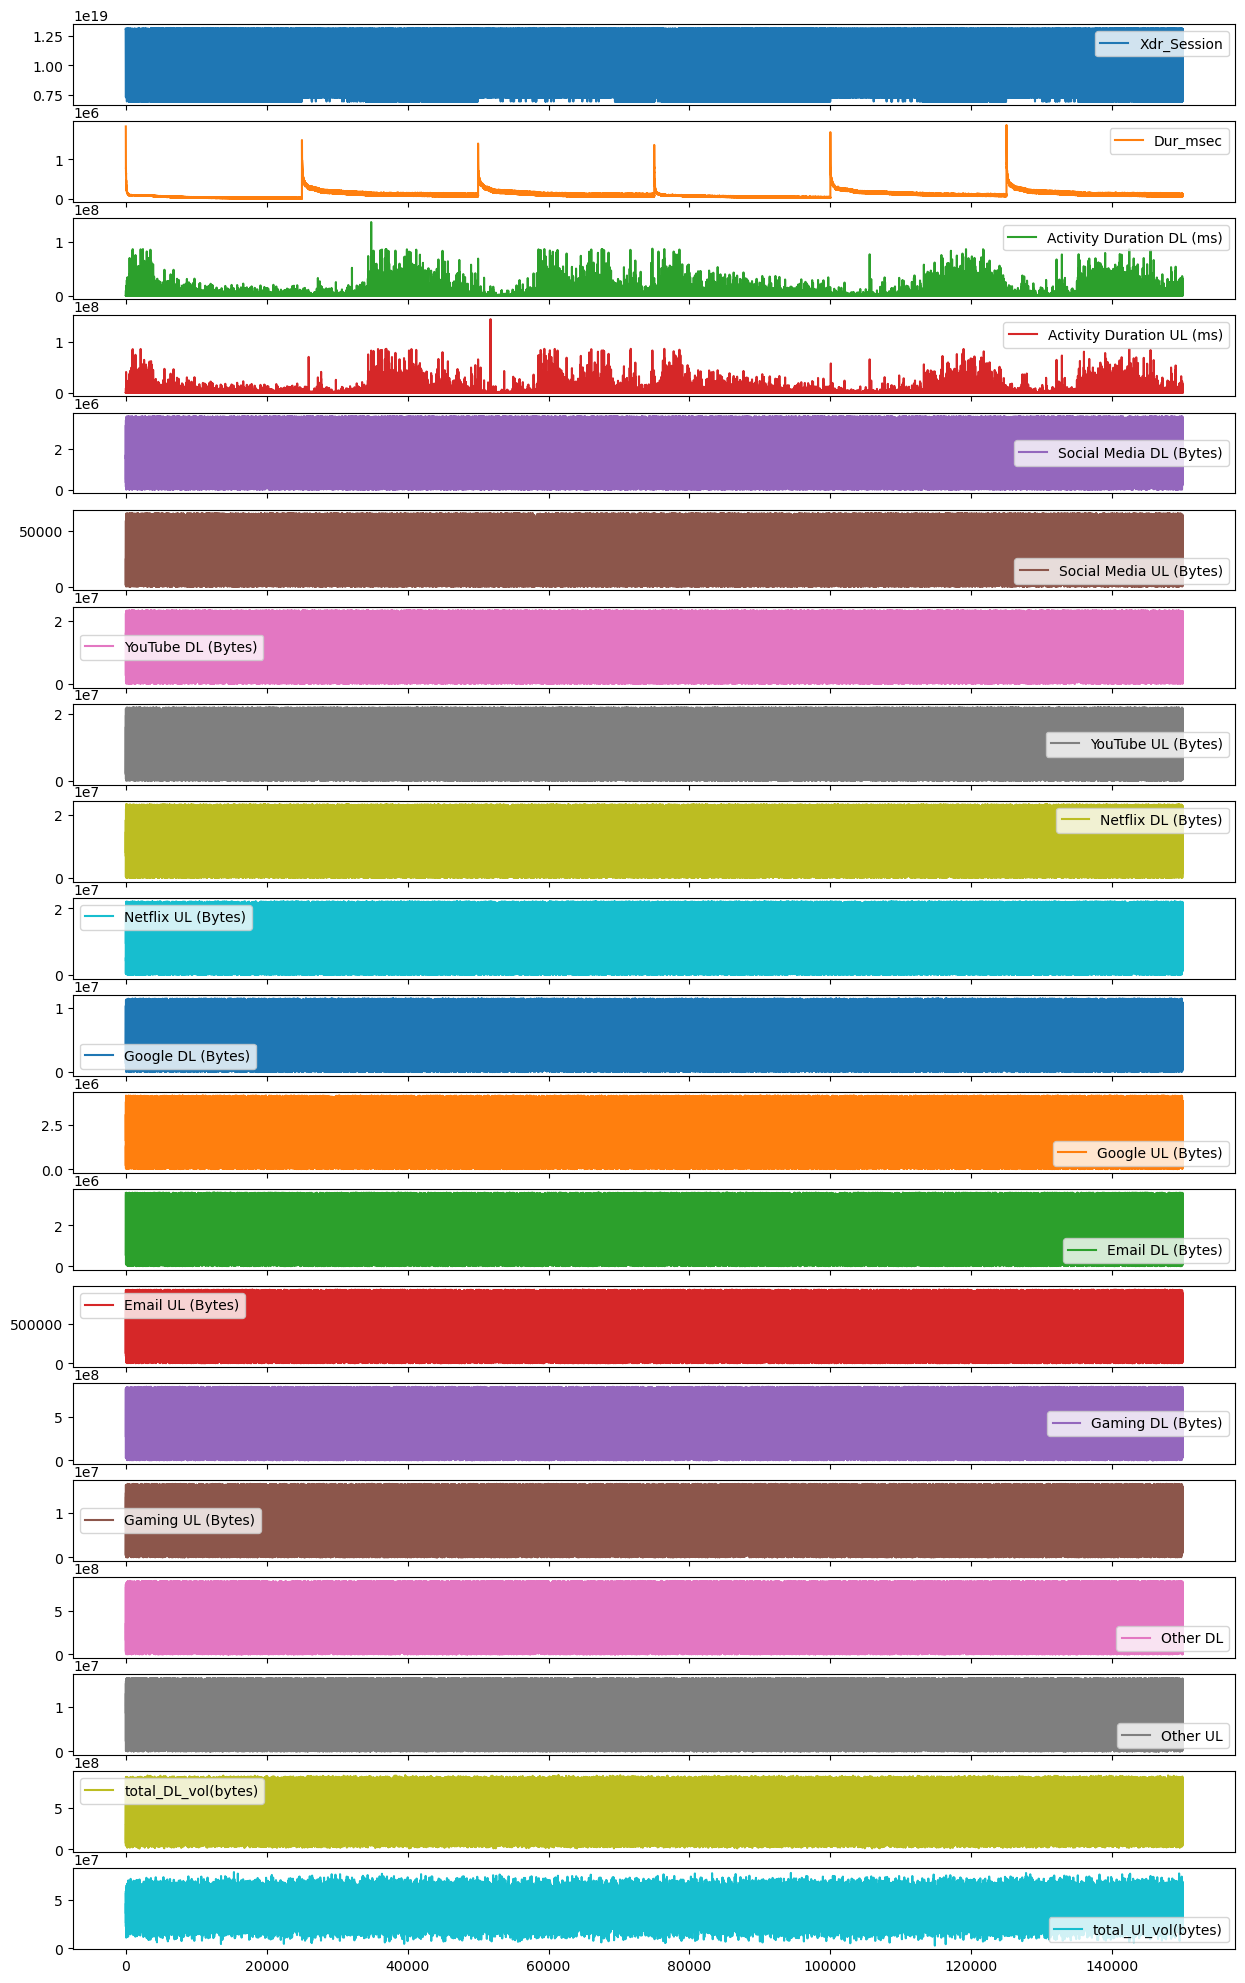

In [41]:
df.plot(subplots=True,figsize=(15,25))
plt.show()

In [42]:
df.columns

Index(['Xdr_Session', 'Dur_msec', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'YouTube DL (Bytes)', 'YouTube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Google DL (Bytes)',
       'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL', 'Other UL',
       'total_DL_vol(bytes)', 'total_Ul_vol(bytes)'],
      dtype='object')

In [43]:

df.head()

Xdr_Session   Dur_msec  Activity Duration DL (ms)  \
0  1.311450e+19  1823652.0                    37624.0   
1  1.311450e+19  1365104.0                      168.0   
2  1.311450e+19  1361762.0                        0.0   
3  1.311450e+19  1321509.0                     3330.0   
4  1.311450e+19  1089009.0                        0.0   

   Activity Duration UL (ms)  Social Media DL (Bytes)  \
0                    38787.0                1545765.0   
1                     3560.0                1926113.0   
2                        0.0                1684053.0   
3                    37882.0                 644121.0   
4                        0.0                 862600.0   

   Social Media UL (Bytes)  YouTube DL (Bytes)  YouTube UL (Bytes)  \
0                  24420.0          15854611.0           2501332.0   
1                   7165.0          20247395.0          19111729.0   
2                  42224.0          19725661.0          14699576.0   
3                  13372.0          21388122.0          15146643.0   
4                  50188.0          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Google DL (Bytes)  \
0           8198936.0           9656251.0          1634479.0   
1          18338413.0          17227132.0          3493924.0   
2          17587794.0           6163408.0          8535055.0   
3          13994646.0           1097942.0          9023734.0   
4          17124581.0            415218.0          6248284.0   

   Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  Gaming DL (Bytes)  \
0          1271433.0         3563542.0          137762.0        278082303.0   
1           920172.0          629046.0          308339.0        608750074.0   
2          1694064.0         2690151.0          672973.0        229584621.0   
3          2788027.0         1439754.0          631229.0        799538153.0   
4          1500559.0         1936496.0          173853.0        527707248.0   

   Gaming UL (Bytes)     Other DL    Other UL  total_DL_vol(bytes)  \
0         14344150.0  171744450.0   8814393.0          308879636.0   
1          1170709.0  526904238.0  15055145.0          653384965.0   
2           395630.0  410692588.0   4215763.0          279807335.0   
3         10849722.0  749039933.0  12797283.0          846028530.0   
4          3529801.0  550709500.0  13910322.0          569138589.0   

   total_Ul_vol(bytes)  
0           36749741.0  
1           53800391.0  
2           27883638.0  
3           43324218.0  
4           38542814.0

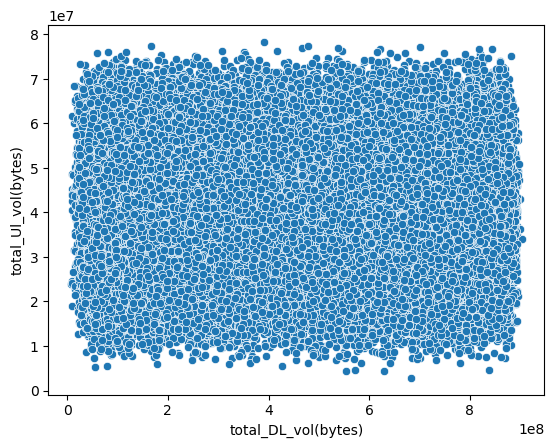

<Figure size 640x480 with 0 Axes>

In [44]:
sns.scatterplot(x='total_DL_vol(bytes)',y='total_Ul_vol(bytes)',data=df)

plt.show()
plt.savefig('scatter1.png')

In [45]:
df.columns

Index(['Xdr_Session', 'Dur_msec', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'YouTube DL (Bytes)', 'YouTube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Google DL (Bytes)',
       'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL', 'Other UL',
       'total_DL_vol(bytes)', 'total_Ul_vol(bytes)'],
      dtype='object')

KeyboardInterrupt: 

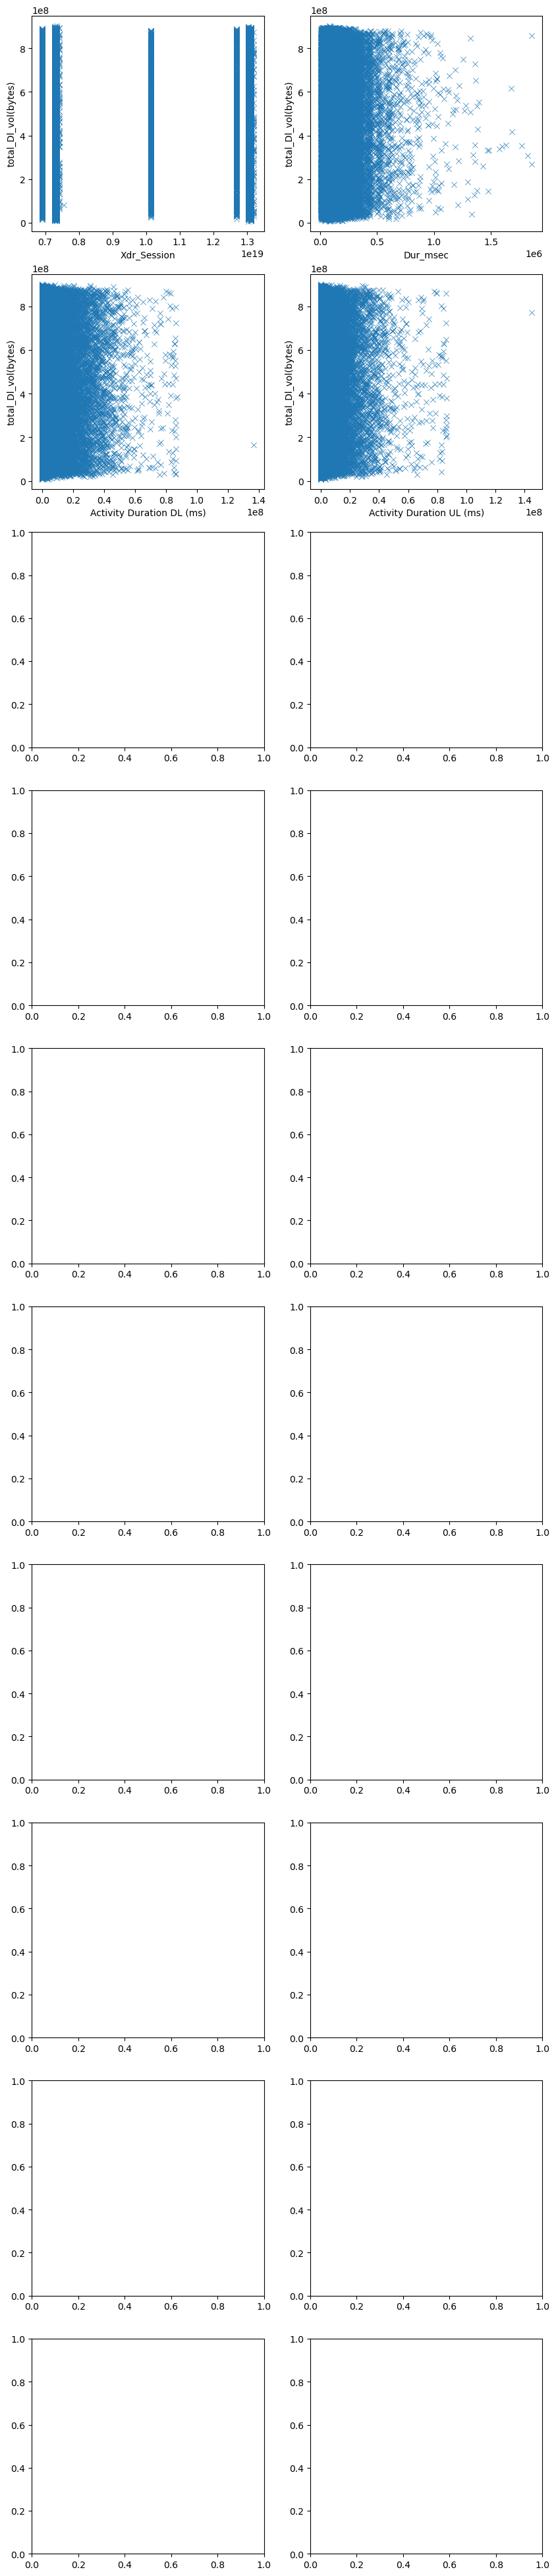

In [47]:

num_cols = 2  # Number of subplots per row
num_rows = (len(df.columns) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5*num_rows))

for i, column in enumerate(df.columns):
    row = i // num_cols
    col = i % num_cols
    
    sns.scatterplot(data=df, x=column, y="total_Ul_vol(bytes)", ax=axes[row, col], marker="x")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("total_Ul_vol(bytes)")
    
plt.tight_layout()
plt.savefig('scatter_plots_ul.png')
plt.show()

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5*num_rows))

for i, column in enumerate(df.columns):
    row = i // num_cols
    col = i % num_cols
    
    sns.scatterplot(data=df, x=column, y="total_DL_vol(bytes)", ax=axes[row, col], marker="x")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("total_Dl_vol(bytes)")
    
plt.tight_layout()
plt.savefig('scatter_plots_dl.png')
plt.show()

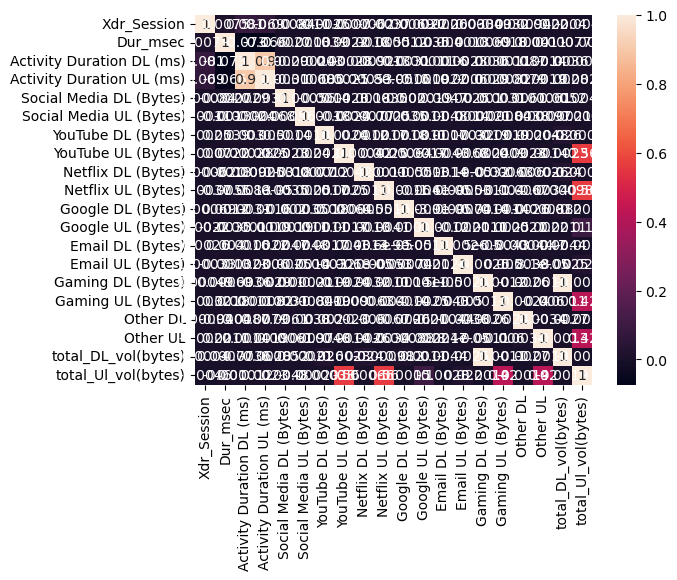

In [49]:
# To visualize the correlation between the features
sns.heatmap(df.corr(),annot=True)

plt.savefig('heatplot1.png')
plt.show()

In [50]:
data.corr()

Bearer Id  Start ms    End ms  \
Bearer Id                                  1.000000  0.002961 -0.001219   
Start ms                                   0.002961  1.000000  0.120945   
End ms                                    -0.001219  0.120945  1.000000   
Dur. (ms)                                  0.007516  0.001287 -0.001302   
IMSI                                       0.000112 -0.000066  0.000320   
MSISDN/Number                             -0.003307 -0.001021 -0.001890   
IMEI                                       0.164053 -0.001133 -0.000032   
Avg RTT DL (ms)                           -0.022562  0.004141 -0.005287   
Avg RTT UL (ms)                            0.034923 -0.002221 -0.002607   
Avg Bearer TP DL (kbps)                    0.063972 -0.000690  0.000694   
Avg Bearer TP UL (kbps)                    0.048122 -0.001268  0.000687   
TCP DL Retrans. Vol (Bytes)                0.019186  0.000328  0.004941   
TCP UL Retrans. Vol (Bytes)                0.008768 -0.003581 -0.003375   
DL TP < 50 Kbps (%)                       -0.069364  0.000720 -0.003683   
50 Kbps < DL TP < 250 Kbps (%)             0.044334 -0.003107  0.004041   
250 Kbps < DL TP < 1 Mbps (%)              0.062259 -0.000161  0.002347   
DL TP > 1 Mbps (%)                         0.063332  0.002657  0.002761   
UL TP < 10 Kbps (%)                       -0.041051  0.000254 -0.001993   
10 Kbps < UL TP < 50 Kbps (%)              0.032302 -0.000158  0.002116   
50 Kbps < UL TP < 300 Kbps (%)             0.016860  0.000389  0.002523   
UL TP > 300 Kbps (%)                       0.010717  0.000124 -0.001948   
HTTP DL (Bytes)                            0.029862  0.003431  0.003216   
HTTP UL (Bytes)                            0.030761  0.001835 -0.001732   
Activity Duration DL (ms)                  0.081537 -0.000043  0.000404   
Activity Duration UL (ms)                  0.069184 -0.000338 -0.000790   
Dur. (ms).1                                0.007516  0.001287 -0.001302   
Nb of sec with 125000B < Vol DL            0.068757  0.007230  0.002237   
Nb of sec with 1250B < Vol UL < 6250B      0.033748 -0.000899  0.000798   
Nb of sec with 31250B < Vol DL < 125000B   0.087384  0.000793  0.002715   
Nb of sec with 37500B < Vol UL             0.011416 -0.001777 -0.008467   
Nb of sec with 6250B < Vol DL < 31250B     0.083259 -0.001404  0.006226   
Nb of sec with 6250B < Vol UL < 37500B     0.015573 -0.003553 -0.000638   
Nb of sec with Vol DL < 6250B              0.083281  0.000196 -0.004367   
Nb of sec with Vol UL < 1250B              0.076739  0.002220 -0.002287   
Social Media DL (Bytes)                   -0.000845  0.001262  0.003102   
Social Media UL (Bytes)                   -0.001124  0.000385 -0.004010   
Google DL (Bytes)                         -0.000693  0.002274 -0.001284   
Google UL (Bytes)                          0.002257  0.000722  0.004191   
Email DL (Bytes)                           0.002626  0.001144 -0.002262   
Email UL (Bytes)                          -0.000328 -0.001176 -0.000538   
Youtube DL (Bytes)                        -0.002466 -0.001582 -0.003741   
Youtube UL (Bytes)                        -0.000703  0.001238 -0.003450   
Netflix DL (Bytes)                        -0.000622 -0.002593  0.004132   
Netflix UL (Bytes)                        -0.003725 -0.002334 -0.001156   
Gaming DL (Bytes)                          0.000487 -0.004229 -0.004687   
Gaming UL (Bytes)                         -0.003212 -0.002512  0.000988   
Other DL (Bytes)                           0.000943 -0.003687  0.002758   
Other UL (Bytes)                          -0.002240  0.003803  0.002786   
Total UL (Bytes)                          -0.004577 -0.000028 -0.000574   
Total DL (Bytes)                           0.000400 -0.004299 -0.004687   

                                          Dur. (ms)      IMSI  MSISDN/Number  \
Bearer Id                                  0.007516  0.000112      -0.003307   
Start ms                                   0.001287 -0.0

In [51]:
data.corr()>0.5

Bearer Id  Start ms  End ms  \
Bearer Id                                      True     False   False   
Start ms                                      False      True   False   
End ms                                        False     False    True   
Dur. (ms)                                     False     False   False   
IMSI                                          False     False   False   
MSISDN/Number                                 False     False   False   
IMEI                                          False     False   False   
Avg RTT DL (ms)                               False     False   False   
Avg RTT UL (ms)                               False     False   False   
Avg Bearer TP DL (kbps)                       False     False   False   
Avg Bearer TP UL (kbps)                       False     False   False   
TCP DL Retrans. Vol (Bytes)                   False     False   False   
TCP UL Retrans. Vol (Bytes)                   False     False   False   
DL TP < 50 Kbps (%)                           False     False   False   
50 Kbps < DL TP < 250 Kbps (%)                False     False   False   
250 Kbps < DL TP < 1 Mbps (%)                 False     False   False   
DL TP > 1 Mbps (%)                            False     False   False   
UL TP < 10 Kbps (%)                           False     False   False   
10 Kbps < UL TP < 50 Kbps (%)                 False     False   False   
50 Kbps < UL TP < 300 Kbps (%)                False     False   False   
UL TP > 300 Kbps (%)                          False     False   False   
HTTP DL (Bytes)                               False     False   False   
HTTP UL (Bytes)                               False     False   False   
Activity Duration DL (ms)                     False     False   False   
Activity Duration UL (ms)                     False     False   False   
Dur. (ms).1                                   False     False   False   
Nb of sec with 125000B < Vol DL               False     False   False   
Nb of sec with 1250B < Vol UL < 6250B         False     False   False   
Nb of sec with 31250B < Vol DL < 125000B      False     False   False   
Nb of sec with 37500B < Vol UL                False     False   False   
Nb of sec with 6250B < Vol DL < 31250B        False     False   False   
Nb of sec with 6250B < Vol UL < 37500B        False     False   False   
Nb of sec with Vol DL < 6250B                 False     False   False   
Nb of sec with Vol UL < 1250B                 False     False   False   
Social Media DL (Bytes)                       False     False   False   
Social Media UL (Bytes)                       False     False   False   
Google DL (Bytes)                             False     False   False   
Google UL (Bytes)                             False     False   False   
Email DL (Bytes)                              False     False   False   
Email UL (Bytes)                              False     False   False   
Youtube DL (Bytes)                            False     False   False   
Youtube UL (Bytes)                            False     False   False   
Netflix DL (Bytes)                            False     False   False   
Netflix UL (Bytes)                            False     False   False   
Gaming DL (Bytes)                             False     False   False   
Gaming UL (Bytes)                             False     False   False   
Other DL (Bytes)                              False     False   False   
Other UL (Bytes)                              False     False   False   
Total UL (Bytes)                              False     False   False   
Total DL (Bytes)                              False     False   False   

                                          Dur. (ms)   IMSI  MSISDN/Number  \
Bearer Id                                     False  False          False   
Start ms                                      False  False          False   
End ms                                        False  False          False   
Dur. (ms) 

In [52]:
 

# Calculate total duration for all sessions per user
total_duration = df.groupby('Xdr_Session')['Dur_msec'].sum().reset_index()

# Sort users based on total session duration in descending order
sorted_users = total_duration.sort_values('Dur_msec', ascending=False)

# Divide users into deciles
num_users = sorted_users.shape[0]
decile_size = num_users // 10  # Number of users in each decile
top_five_deciles = sorted_users.head(decile_size * 5)  # Select top five deciles

# Compute total data (DL+UL) per decile class
top_five_deciles = top_five_deciles.merge(df, on='Xdr_Session')  # Merge with original data
total_data_per_decile = top_five_deciles.groupby(pd.qcut(top_five_deciles.index, 5, labels=False))["total_DL_vol(bytes)","total_Ul_vol(bytes)"].sum()

# Display the total data per decile class
print(total_data_per_decile)

   total_DL_vol(bytes)  total_Ul_vol(bytes)
0         1.346957e+13         1.217344e+12
1         1.344432e+13         1.210583e+12
2         1.341307e+13         1.215629e+12
3         1.343096e+13         1.214060e+12
4         1.344861e+13         1.221680e+12


In [53]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components=2)

In [55]:
pca.fit(df) # Fit PCA on data 

PCA(n_components=2)

In [56]:
# Transform the data to the principal components
data_pca = pca.transform(df)

In [57]:
df.shape

(150001, 20)

In [58]:
data_pca.shape

(150001, 2)

In [59]:
pca.components_

array([[-1.00000000e+00, -2.10583793e-16, -1.60945072e-13,
        -1.11325980e-13,  3.02297938e-16,  7.38791539e-18,
         5.71984302e-15,  1.54237757e-15,  1.44567583e-15,
         8.18649372e-15,  7.92511060e-16, -9.28169059e-16,
        -9.40225777e-16,  3.05739846e-17, -4.10684622e-14,
         5.30875692e-15, -7.92935173e-14,  3.69221782e-15,
        -3.37483601e-14,  1.78396389e-14],
       [ 5.25923310e-14, -1.70840745e-07,  6.06791571e-05,
         3.91667313e-05, -9.23437775e-06, -1.20241251e-08,
        -2.31899825e-04,  4.32006059e-05, -2.07059459e-04,
         1.83820811e-05, -5.17576618e-05, -3.89105425e-06,
        -6.67746290e-06,  1.96182558e-06, -7.06848507e-01,
        -1.55419092e-05,  3.71316078e-03,  1.70922986e-05,
        -7.07355136e-01,  6.11918236e-05]])

In [60]:
component_loadings = pca.components_

In [61]:
explained_variance_ratio = pca.explained_variance_ratio_

In [62]:
explained_variance_ratio

array([1.00000000e+00, 1.43202256e-20])

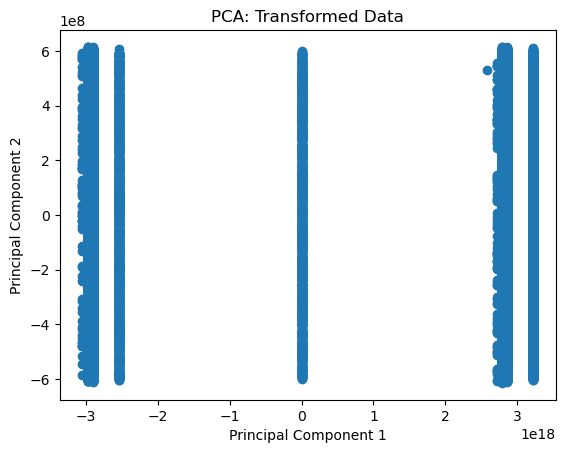

In [63]:

# Data visualization
# We can plot the transformed data_pca to visualize the data in a lower-dimensional space.
# By plotting the first two components (data_pca[:, 0] and data_pca[:, 1]), we can observe patterns, clusters, or separations that were not apparent in the original high-dimensional space.
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Transformed Data')
plt.show()




